# 1. Univariate linear regression for binary classification

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from utils import *

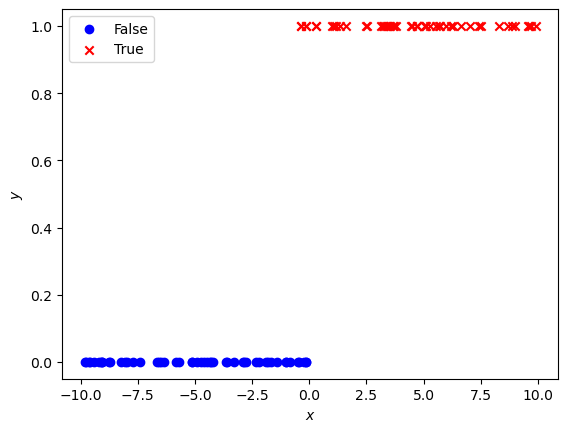

In [2]:
x_train = generate_univariate_x(100)
y_train = generate_binary_y(100)
plt_binary_classification(x_train, y_train)
plt.legend(["False", "True"])
plt.show()

In [3]:

linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w = linear_model.coef_[0]
b = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w:8.4f},{b:8.4f})")

(w,b) found by sklearn: (  0.0746,  0.5142)


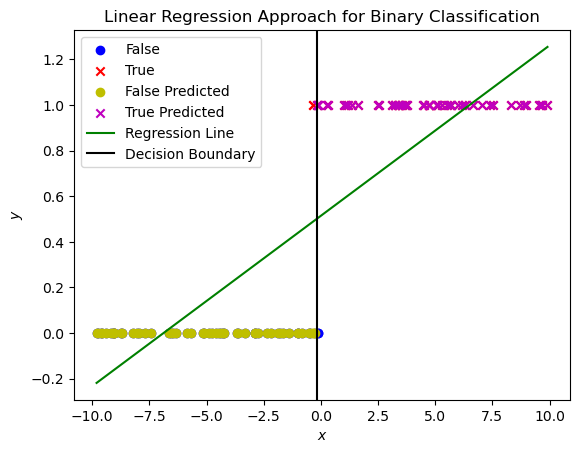

In [4]:
y_pred = linear_model.predict(x_train.reshape(-1, 1))
y_pred = np.where(y_pred < 0.5, 0, 1)

plt_binary_classification(x_train, y_train)

plt.scatter(x_train[y_pred == 0], y_pred[y_pred == 0], marker='o', c='y')
plt.scatter(x_train[y_pred == 1], y_pred[y_pred == 1], marker='x', c='m')

plt.plot(x_train, linear_model.predict(x_train.reshape(-1, 1)), c='g')
plt.axvline(x=(0.5 - b) / w, c='k')

plt.legend(['False', 'True', 'False Predicted', 'True Predicted',
           'Regression Line', 'Decision Boundary'])
plt.title("Linear Regression Approach for Binary Classification")
plt.show()


In [5]:
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.9592
accuracy:   0.9600


# 2. 2 variable linear regression for binary classification

## Working with 2d plot

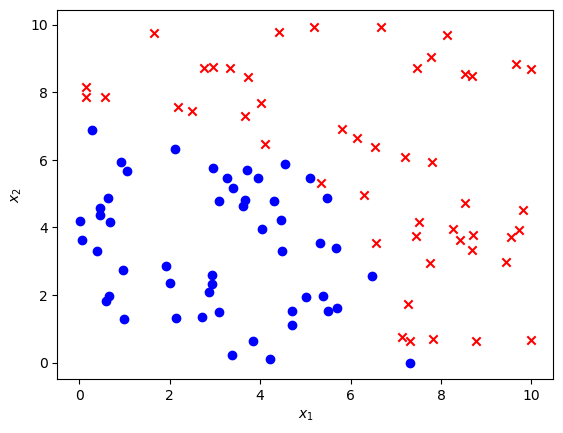

In [6]:
X_train = generate_multivariate_x(100, 2)
y_train = generate_binary_y(100)

plt_2d_binary_classification(X_train, y_train)
plt.show()

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w_final[0]:8.4f},{w_final[1]:8.4f},{b_final:8.4f})")

(w,b) found by sklearn: (  0.1021,  0.0912, -0.4143)


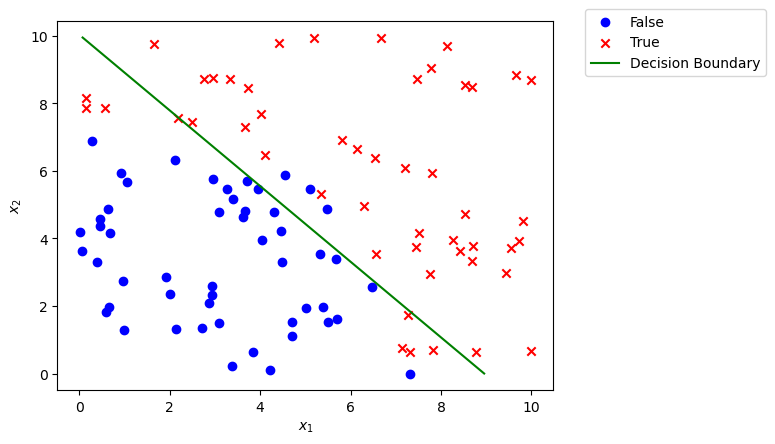

In [8]:
plt_2d_binary_classification(X_train, y_train)

x2_min = X_train[:, 1].min()
x2_max = X_train[:, 1].max()
x1_min = (0.5 - b_final - w_final[1] * x2_min) / w_final[0]
x1_max = (0.5 - b_final - w_final[1] * x2_max) / w_final[0]
plt.plot([x1_min, x1_max], [x2_min, x2_max], c='g')
plt.legend(["False", "True", "Decision Boundary"],  loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

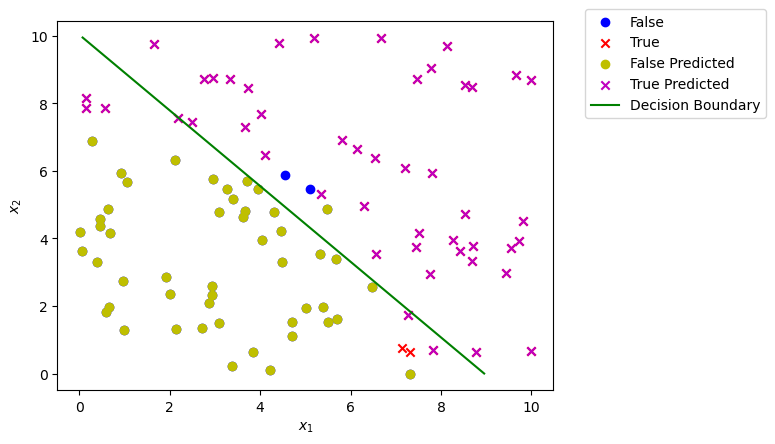

In [9]:
plt_2d_binary_classification(X_train, y_train)

X_false = X_train[(y_pred == 0) & (y_train == 1) | (y_pred == 1) & (y_train == 0)]
y_false  = y_train[(y_pred == 0) & (y_train == 1) | (y_pred == 1) & (y_train == 0)]

X_true = X_train[(y_pred == 0) & (y_train == 0) | (y_pred == 1) & (y_train == 1)]
y_true  = y_train[(y_pred == 0) & (y_train == 0) | (y_pred == 1) & (y_train == 1)]

plt.scatter(X_true[y_true == 0, 0], X_true[y_true == 0, 1], marker='o', c='y')
plt.scatter(X_true[y_true == 1, 0], X_true[y_true == 1, 1], marker='x', c='m')

plt.plot([x1_min, x1_max], [x2_min, x2_max], c='g')

plt.legend(["False", "True", "False Predicted", "True Predicted", "Decision Boundary"],  loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

## Working with 3d plot

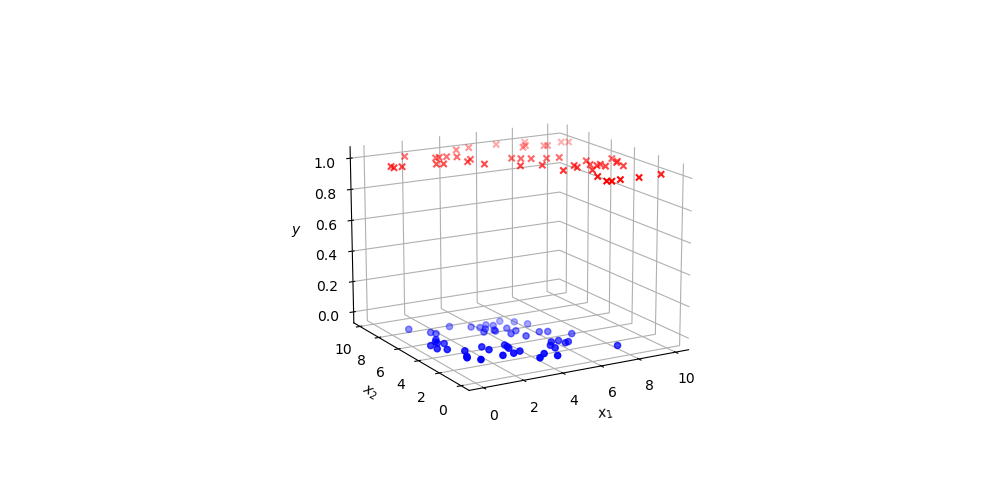

In [10]:
%matplotlib widget

ax = plt_3d_binary_classification(X_train, y_train)

plt.show()

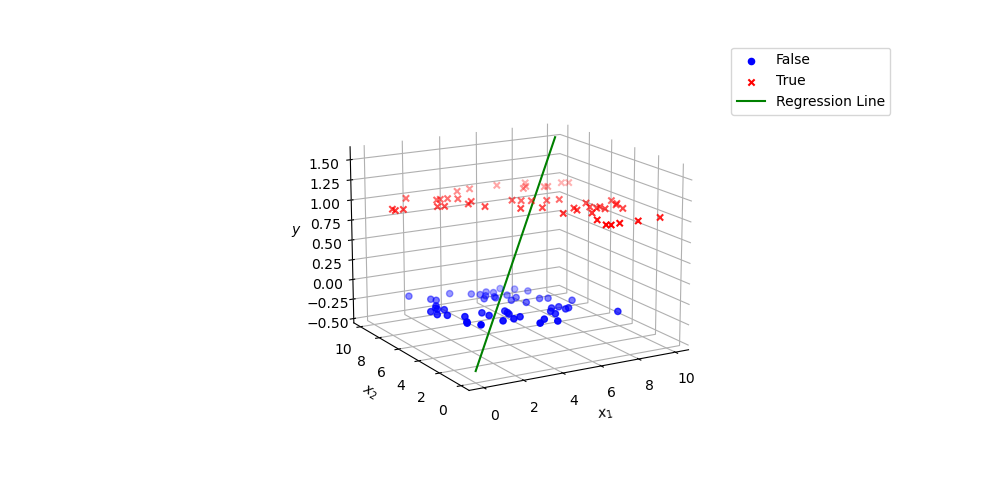

In [11]:
plt.close('all')
reg_line_x1 = np.linspace(0, 10, 100)
reg_line_x2 = np.linspace(0, 10, 100)
y_pred = linear_model.predict(np.c_[reg_line_x1, reg_line_x2])
ax = plt_3d_binary_classification(X_train, y_train)
ax.plot(reg_line_x1, reg_line_x2, y_pred, c='g')
plt.legend(['False', 'True', 'Regression Line'], loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

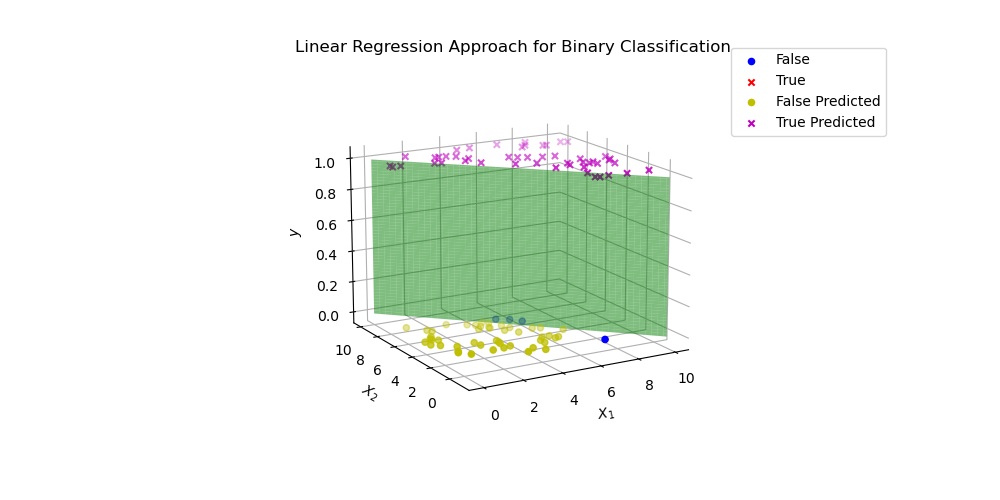

In [12]:
y_pred = np.where(y_pred < 0.5, 0, 1)

X_false = X_train[(y_pred == 0) & (y_train == 1) | (y_pred == 1) & (y_train == 0)]
y_false  = y_train[(y_pred == 0) & (y_train == 1) | (y_pred == 1) & (y_train == 0)]

X_true = X_train[(y_pred == 0) & (y_train == 0) | (y_pred == 1) & (y_train == 1)]
y_true  = y_train[(y_pred == 0) & (y_train == 0) | (y_pred == 1) & (y_train == 1)]

ax = plt_3d_binary_classification(X_false, y_false)

ax.scatter(X_true[y_true == 0, 0], X_true[y_true == 0, 1], y_true[y_true == 0], marker='o', c='y')
ax.scatter(X_true[y_true == 1, 0], X_true[y_true == 1, 1], y_true[y_true == 1], marker='x', c='m')

plt.legend(['False', 'True', 'False Predicted', 'True Predicted'], loc='upper left', bbox_to_anchor=(1.05, 1.05))

x1 = np.linspace(0, 10, 100)
x2 = (0.5 - b_final - w_final[0] * x1)/w_final[1]
z = np.linspace(0, 1, 100)
X1, Z = np.meshgrid(x1, z)
X2 = (0.5 - b_final - w_final[0] * X1)/w_final[1]
ax.plot_surface(X1, X2, Z, alpha=0.5, color='g')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$y$', rotation=90)
plt.title("Linear Regression Approach for Binary Classification")
plt.show()

In [13]:
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.9608
accuracy:   0.9600


# 3. Multivariate linear regression for binary classification

In [14]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_binary_y(100)

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_

In [16]:
y_pred =  linear_model.predict(X_train)
y_pred = np.where(y_pred < 0.5, 0, 1)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.8846
accuracy:   0.8800


# 4. Univariate linear regression for multi-class classification

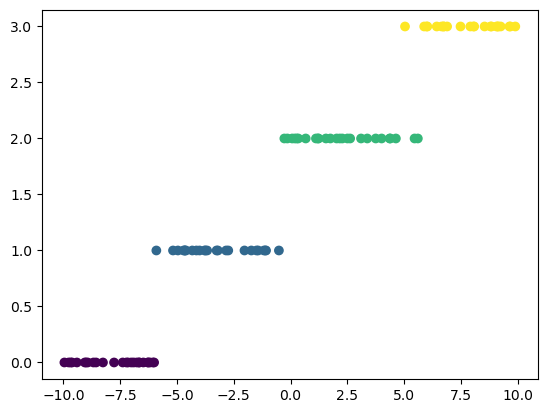

In [17]:
%matplotlib inline

x_train = generate_univariate_x(100)
y_train = generate_multiclass_y(100)

plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.show()

In [18]:
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w_final[0]:8.4f},{b_final:8.4f})")

(w,b) found by sklearn: (  0.1792,  1.5396)


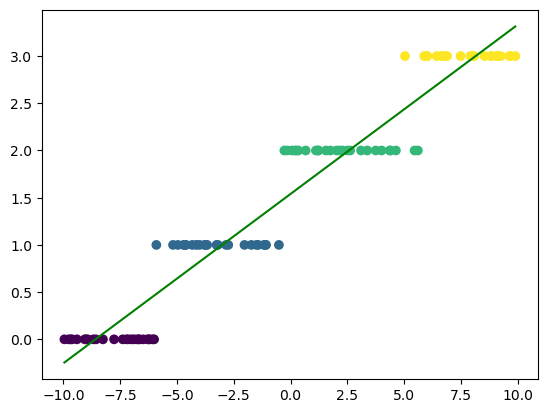

In [19]:
y_pred = linear_model.predict(x_train.reshape(-1, 1))

plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.plot(x_train, y_pred, c='g')
plt.show()

In [20]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


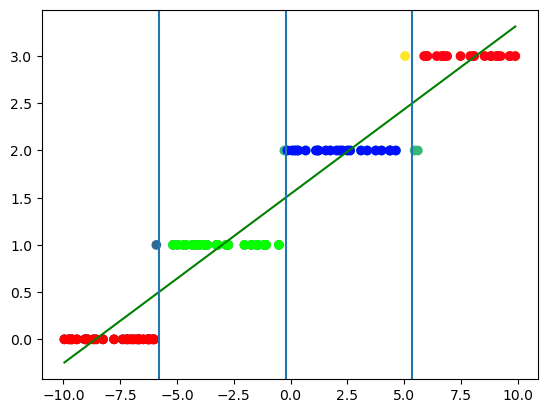

In [21]:
y_pred = classify(y_pred, y_borders, classes)

true_predicted = y_pred == y_train
x_true = x_train[true_predicted]
y_true = y_train[true_predicted]

plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.scatter(x_true, y_true, cmap='hsv', c=y_true)

plt.plot(x_train, linear_model.predict(x_train.reshape(-1, 1)), c='g')
for i in y_borders:
    solution = (i - b_final )/ w_final
    plt.axvline(x=solution)
plt.show()

In [22]:
accuracy = accuracy_score(y_train, y_pred)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.9500


# 5. 2 variable linear regression for multi-class classification

## Working with 2d plot

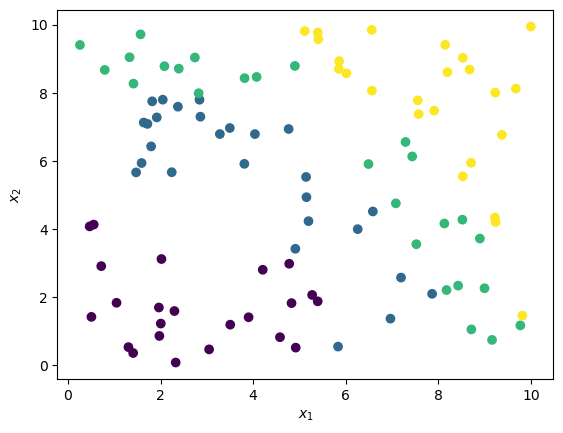

In [23]:
X_train = generate_multivariate_x(100, 2)
y_train = generate_multiclass_y(100)
plt_2d_multiclass_classification(X_train, y_train)
plt.show()

In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w_final[0]:8.4f},{w_final[1]:8.4f},{b_final:8.4f})")

(w,b) found by sklearn: (  0.2462,  0.2360, -0.9660)


In [25]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


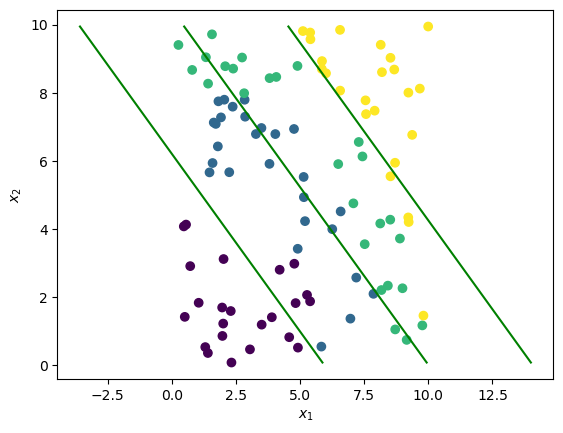

In [26]:
plt_2d_multiclass_classification(X_train, y_train)

plt_borders(X_train, y_train, w_final, b_final)

plt.show()

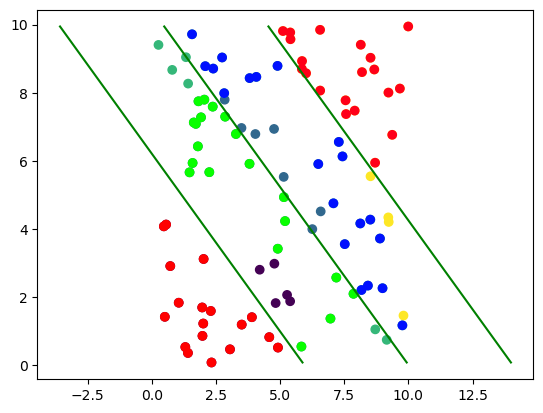

In [27]:
y_pred = linear_model.predict(X_train)
y_pred = classify(y_pred, y_borders, classes)

true_predicted = y_pred == y_train
X_true = X_train[true_predicted]
y_true = y_train[true_predicted]

plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis', c=y_train)
plt.scatter(X_true[:, 0], X_true[:, 1], cmap='hsv', c=y_true)

plt_borders(X_train, y_train, w_final, b_final)

plt.show()

## Working with 3d plot

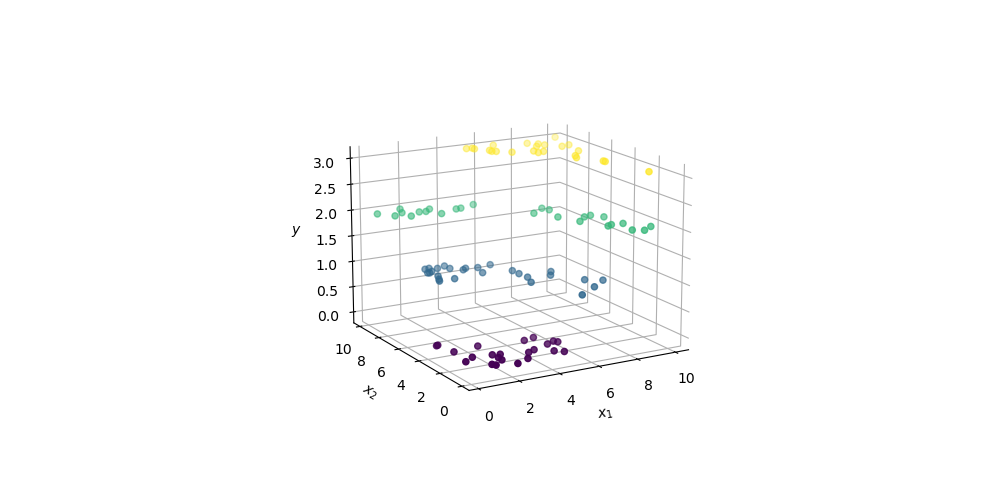

In [28]:
%matplotlib widget

ax = plt_3d_multiclass_classification(X_train, y_train)

plt.show()

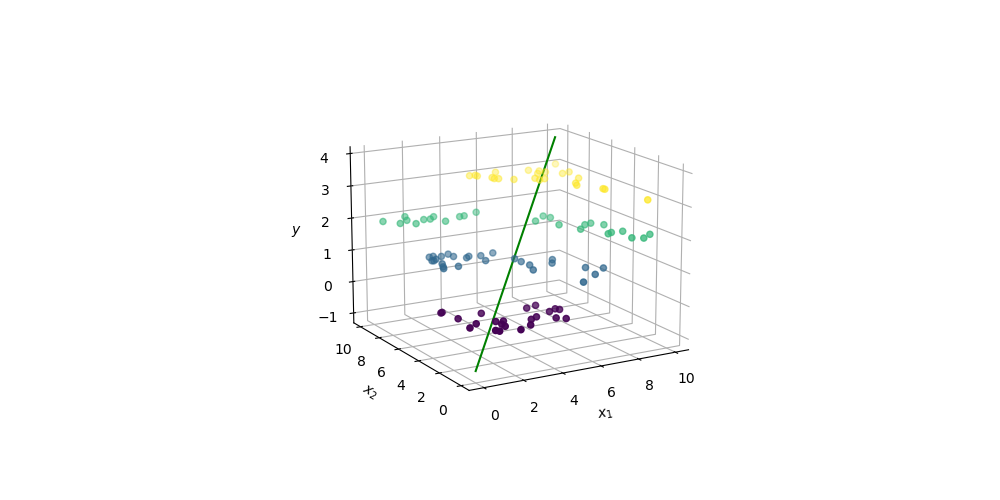

In [29]:
ax = plt_3d_multiclass_classification(X_train, y_train)

y_pred = linear_model.predict(X_train)

reg_line_x1 = np.linspace(0, 10, 100)
reg_line_x2 = np.linspace(0, 10, 100)
reg_line_y = linear_model.predict(np.c_[reg_line_x1, reg_line_x2])

ax.plot(reg_line_x1, reg_line_x2, reg_line_y, c='g')
plt.show()

In [30]:
y_pred = classify(y_pred, y_borders, classes)

accuracy = accuracy_score(y_train, y_pred)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.7800


# 6. Mutli variable linear regression for multi-class classification

In [31]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_multiclass_y(100)

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w = linear_model.coef_
b = linear_model.intercept_

In [33]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


In [34]:
y_pred = linear_model.predict(X_train)
y_pred = classify(y_pred, y_borders, classes)

In [35]:
accuracy = accuracy_score(y_train, y_pred)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.7700
